In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython import display
import quandl

In [4]:
plt.plot([1,2,3], [5,7,4])
plt.xlabel('Plot Number')
plt.ylabel('Important Var')

plt.title('Interesting Graph Test')

Text(0.5,1,'Interesting Graph Test')

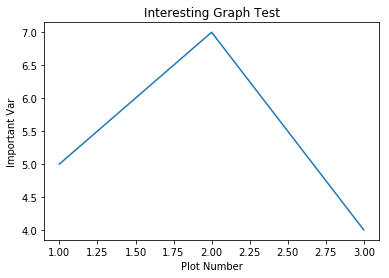

In [5]:
plt.show()

In [11]:
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 2, 4]

x2= [1, 3, 6, 9, 11]
y2 = [7, 8, 2, 4, 2]

In [16]:
plt.bar(x, y, label = "Bar1", color="blue")
plt.bar(x2, y2, label = "Bar2")

<Container object of 5 artists>

In [17]:
plt.legend()

In [29]:
x = np.random.randint(0,10,3)
y = np.random.randint(0,10,3)

print (x)
print (y)

[5 9 5]
[5 4 2]


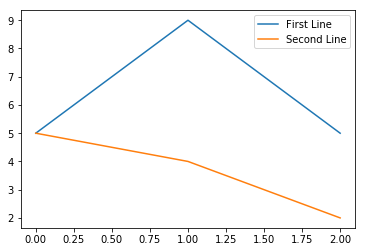

In [30]:
plt.plot(x, label="First Line")
plt.plot(y, label="Second Line")
plt.legend()
plt.show()


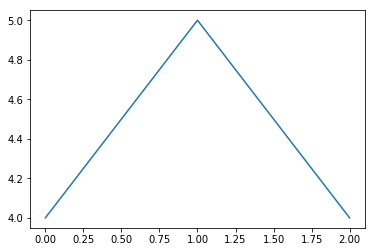

In [28]:
plt.show()

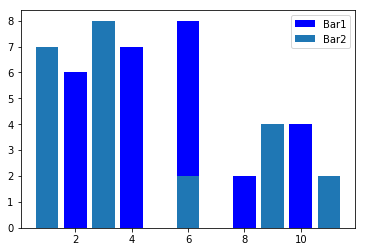

In [18]:
plt.show()

In [ ]:
x = np.random.randint(0,10,3)
y = np.random.randint(0,10,3)

print (x)
print (y)

In [32]:
days = [x for x in range (0,5)]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c','r','b'])

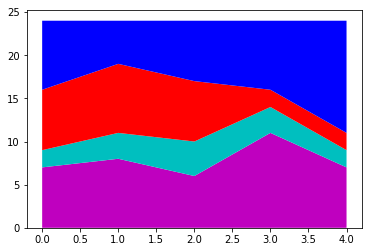

In [33]:
plt.show()

In [3]:
mydata = quandl.get("CMHC/HPPA50_QC")

In [5]:
CMHC_data = pd.DataFrame(data=mydata)

In [6]:
CMHC_data.head(5)

,1st 20%,2nd 40%,3rd 60%,4th 80%,Median,Average,Units
Date,,,,,,,
1990-01-31,80000.0,90000.0,110000.0,145000.0,100000.0,118038.0,1137.0
1990-02-28,80000.0,95000.0,110000.0,150000.0,100000.0,122020.0,789.0
1990-03-31,80000.0,90000.0,105000.0,137000.0,95000.0,113384.0,837.0
1990-04-30,85000.0,95000.0,115000.0,150000.0,100000.0,120380.0,1032.0
1990-05-31,85000.0,95000.0,115000.0,145000.0,100000.0,123603.0,1387.0


In [13]:
CMHC_data['Average'].plot(kind='line', legend=True)
CMHC_data['Median'].plot(kind='line', legend=True)
CMHC_data['1st 20%'].plot(kind='line', legend=True)


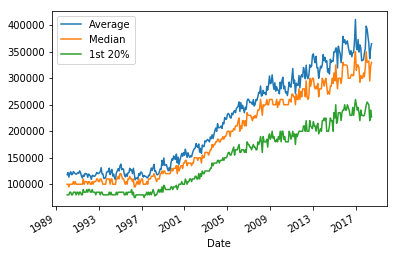

In [14]:
plt.show()

In [72]:
fields = ['REF_DATE', 'GEO', 'Completed dwelling units', 'Type of dwelling unit', 'VALUE']
absorption_data = pd.read_csv(r"C:\Users\dmalvar\Documents\Python Scripts\Real-Estate Data\Absorbtions and unabsorbed inventory.csv", parse_dates=['REF_DATE'], index_col=['REF_DATE'], usecols=fields, encoding='latin-1')

In [180]:
print(absorption_data.head())

                                  GEO Completed dwelling units  \
REF_DATE                                                         
1988-06-01  Census metropolitan areas              Absorptions   
1988-06-01  Census metropolitan areas              Absorptions   
1988-06-01  Census metropolitan areas              Absorptions   
1988-06-01  Census metropolitan areas     Unabsorbed inventory   
1988-06-01  Census metropolitan areas     Unabsorbed inventory   

            Type of dwelling unit  VALUE  
REF_DATE                                  
1988-06-01            Total units   7722  
1988-06-01  Single detached units   7161  
1988-06-01    Semi-detached units    561  
1988-06-01            Total units   5694  
1988-06-01  Single detached units   4932  


In [73]:
montreal_total_absorption_data = absorption_data[(absorption_data.GEO == 'Montréal, Quebec') & (absorption_data['Type of dwelling unit'] == 'Total units')]sql

In [87]:
montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Absorptions'].max()

GEO                         Montréal, Quebec
Completed dwelling units         Absorptions
Type of dwelling unit            Total units
VALUE                                   2303
dtype: object

In [102]:

montreal_total_absorption_data['Total'] = montreal_total_absorption_data.groupby(['REF_DATE','Type of dwelling unit']).transform(sum)

ValueError: Wrong number of items passed 3, placement implies 1

In [136]:
test_df = pd.DataFrame(index=montreal_total_absorption_data.groupby(['REF_DATE']).sum().index)
test_df['Total'] = montreal_total_absorption_data.groupby(['REF_DATE','Type of dwelling unit']).sum().reset_index(['Type of dwelling unit'])['VALUE']
test_df['Absorptions'] = montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Absorptions']['VALUE']
test_df['Unabsorbed inventory'] = montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Unabsorbed inventory']['VALUE']

In [147]:
test_df['Absorption %'] = test_df['Absorptions']/test_df['Total']*100
test_df['Unabsorbed inventory %'] = test_df['Unabsorbed inventory']/test_df['Total']*100
test_df['MA20 Absorption'] = test_df['Absorption %'].rolling(window=20).mean()

In [150]:
test_df.head(30)


AttributeError: 'Series' object has no attribute 'plt'

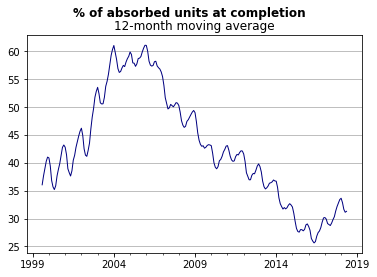

In [179]:
ax = test_df['MA20 Absorption'].plot(lw=1, colormap='jet')
ax.set_xlabel("")
ax.yaxis.grid()

plt.suptitle("% of absorbed units at completion", fontweight="bold")
plt.title("12-month moving average")
plt.show()

In [168]:
test_df['Absorption %'].plot(linestyle=':', legend=True, label='Absorption %')
test_df['Unabsorbed inventory %'].plot(legend=True, label='Unabsorbed inventory %')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

TypeError: 'str' object is not callable

In [123]:
montreal_total_absorption_data.groupby(['REF_DATE','Type of dwelling unit']).sum().reset_index(['Type of dwelling unit'])['VALUE']

REF_DATE
1998-01-01    1033
1998-02-01    1083
1998-03-01    1039
1998-04-01    1169
1998-05-01    1310
1998-06-01    1819
1998-07-01    2566
1998-08-01    1136
1998-09-01    1053
1998-10-01    1113
1998-11-01    1128
1998-12-01    1094
1999-01-01    1086
1999-02-01     985
1999-03-01    1030
1999-04-01    1273
1999-05-01    1600
1999-06-01    1944
1999-07-01    2378
1999-08-01    1165
1999-09-01    1292
1999-10-01    1231
1999-11-01    1165
1999-12-01    1218
2000-01-01    1105
2000-02-01    1074
2000-03-01    1208
2000-04-01    1241
2000-05-01    1531
2000-06-01    1988
              ... 
2015-12-01     795
2016-01-01     670
2016-02-01     677
2016-03-01     666
2016-04-01     707
2016-05-01     769
2016-06-01     858
2016-07-01     822
2016-08-01     653
2016-09-01     629
2016-10-01     671
2016-11-01     652
2016-12-01     658
2017-01-01     573
2017-02-01     599
2017-03-01     612
2017-04-01     623
2017-05-01     647
2017-06-01     734
2017-07-01     768
2017-08-01     629
201

In [42]:
montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Absorptions'].plot()
montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Unabsorbed inventory'].plot()

plt.legend()
plt.plot()

[]

In [84]:
montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Absorptions']['VALUE'].plot(linestyle=':', legend=True, label='Absorptions')
montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Unabsorbed inventory']['VALUE'].plot(legend=True, label='Unabsorbed inventory')

In [81]:
plt.legend()

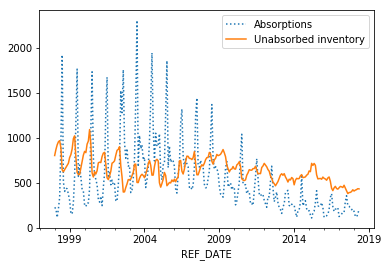

In [85]:
plt.show()

In [165]:
plt.gcf().clear()

In [51]:
index = montreal_total_absorption_data['REF_DATE']

In [ ]:
absorption_data[(absorption_data.GEO == 'Montréal, Quebec') & ()]

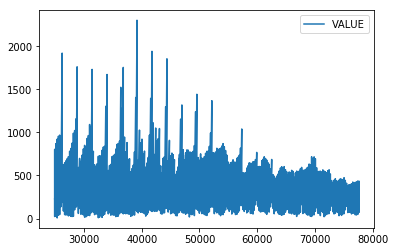

In [28]:
plt.show()